# Loan Application Status Prediction

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score as cvs
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore')

We have imported all the necessary libraries

In [2]:
df=pd.read_csv('loan_prediction.csv')
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


Here we read the CSV file in jupyter notebook.

In [3]:
df = pd.DataFrame(data=df)
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


Here we are loading the dataset into DataFrame.

In [4]:
df.sample(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
223,LP001749,Male,Yes,0,Graduate,No,7578,1010.0,175.0,NaN,1.0,Semiurban,Y
31,LP001095,Male,No,0,Graduate,No,3167,0.0,74.0,360.0,1.0,Urban,N
548,LP002776,Female,No,0,Graduate,No,5000,0.0,103.0,360.0,0.0,Semiurban,N
492,LP002571,Male,No,0,Not Graduate,No,3691,0.0,110.0,360.0,1.0,Rural,Y
427,LP002368,Male,Yes,2,Graduate,No,5935,0.0,133.0,360.0,1.0,Semiurban,Y
328,LP002086,Female,Yes,0,Graduate,No,4333,2451.0,110.0,360.0,1.0,Urban,N
447,LP002435,Male,Yes,0,Graduate,NaN,3539,1376.0,55.0,360.0,1.0,Rural,N
523,LP002693,Male,Yes,2,Graduate,Yes,7948,7166.0,480.0,360.0,1.0,Rural,Y
426,LP002367,Female,No,1,Not Graduate,No,4606,0.0,81.0,360.0,1.0,Rural,N
190,LP001653,Male,No,0,Not Graduate,No,4885,0.0,48.0,360.0,1.0,Rural,Y


Displaying 10 random samples of data to understand it more

# Data Inspection

In [5]:
df.shape

(614, 13)

There are 614 rows and 13 columns in our dataset.

In [6]:
df.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

It gives us the data type of each column.

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


It gives us the Name of columns with its non-null value counts , it's datatype , index number and memory usage.

In [8]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


It gives us the mean , median, standard deviation , minimum and maximum value of all the numerical columns present in the dataset.

In [9]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

It gives us the list of all columns title.

In [10]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

There are null values present in our dataset.

<AxesSubplot:>

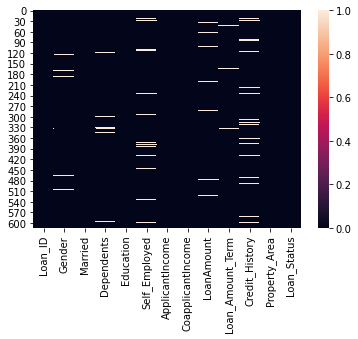

In [11]:
sns.heatmap(df.isnull())

The visual representation of having null values in dataset.

In [12]:
df.skew()

ApplicantIncome      6.539513
CoapplicantIncome    7.491531
LoanAmount           2.677552
Loan_Amount_Term    -2.362414
Credit_History      -1.882361
dtype: float64

There is a lot of skewness in our data.

# Treating Null Values 

In [13]:
from sklearn.impute import SimpleImputer
imp=SimpleImputer(missing_values=np.nan,strategy='most_frequent')
df['Gender']=imp.fit_transform(df['Gender'].values.reshape(-1,1))
df['Married']=imp.fit_transform(df['Married'].values.reshape(-1,1))
df['Self_Employed']=imp.fit_transform(df['Self_Employed'].values.reshape(-1,1))

im=SimpleImputer(missing_values=np.nan,strategy='mean')
df['LoanAmount']=im.fit_transform(df['LoanAmount'].values.reshape(-1,1))
df['Loan_Amount_Term']=im.fit_transform(df['Loan_Amount_Term'].values.reshape(-1,1))
df['Credit_History']=im.fit_transform(df['Credit_History'].values.reshape(-1,1))

We have replaced the NaN values in categorical columns with their Mode, and of numerical columns with their Mean.

# Exploratory Data Analysis

# Univariate Analysis

<AxesSubplot:xlabel='Loan_Status', ylabel='count'>

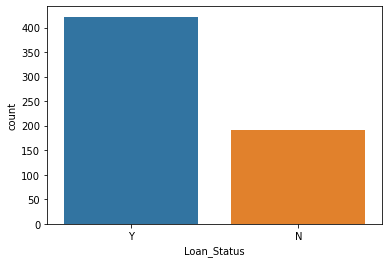

In [14]:
sns.countplot(df['Loan_Status'])

There exists a lot of class imbalance, which we will have to treat for our target variable prediction.

<AxesSubplot:xlabel='Loan_ID', ylabel='Count'>

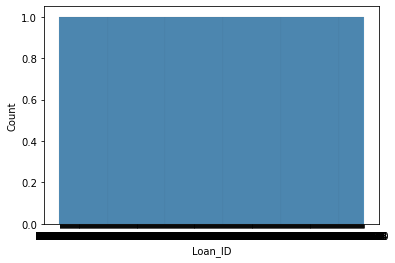

In [15]:
sns.histplot(df['Loan_ID'])

Loan_ID is a column with unique values in it. Hence All the values have same count. 

<AxesSubplot:xlabel='Gender', ylabel='Count'>

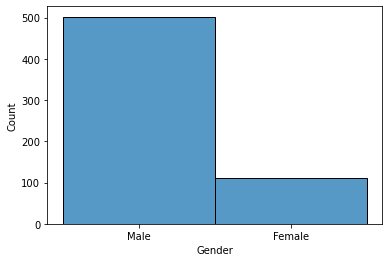

In [16]:
sns.histplot(df['Gender'])

Usually male apply for Loan more than female.

<AxesSubplot:xlabel='Married', ylabel='Count'>

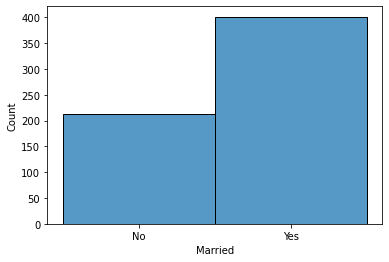

In [17]:
sns.histplot(df['Married'])

Usually More married people apply for Loan.

<AxesSubplot:xlabel='Education', ylabel='Count'>

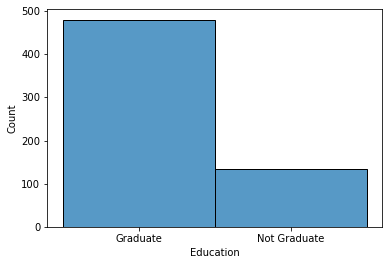

In [18]:
sns.histplot(df['Education'])

Maximum Graduate apply for Loan

<AxesSubplot:xlabel='Self_Employed', ylabel='Count'>

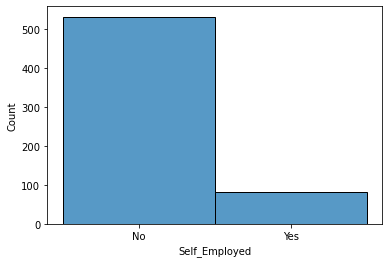

In [19]:
sns.histplot(df['Self_Employed'])

Usually people who apply for loan are Not Self-Employed.

<AxesSubplot:xlabel='ApplicantIncome', ylabel='Count'>

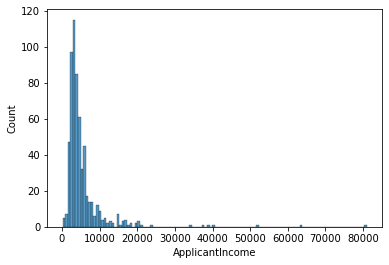

In [20]:
sns.histplot(df['ApplicantIncome'])

Maximum people who apply for loan has an ApplicationIncome in range 3000-6000.

<AxesSubplot:xlabel='CoapplicantIncome', ylabel='Count'>

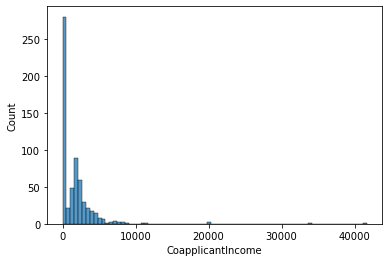

In [21]:
sns.histplot(df['CoapplicantIncome'])

Maximum people who apply for loan has an CoapplicationIncome in range 0-4000. There are no people having CoapplicationIncome more than 10000.

<AxesSubplot:xlabel='LoanAmount', ylabel='Count'>

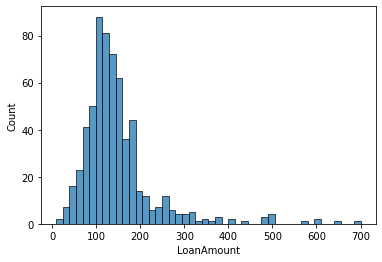

In [22]:
sns.histplot(df['LoanAmount'])

Maximum poeple apply for LoanAmount 100-200.

<AxesSubplot:xlabel='Loan_Amount_Term', ylabel='Count'>

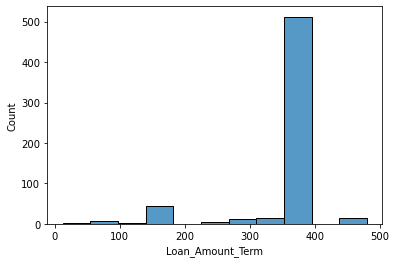

In [23]:
sns.histplot(df['Loan_Amount_Term'])

The maximum Loan_amount_Term is 350-400

<AxesSubplot:xlabel='Credit_History', ylabel='Count'>

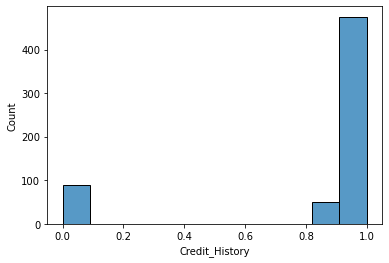

In [24]:
sns.histplot(df['Credit_History'])

The credit_history for maximum applicants lies in range 0.8-1.0

<AxesSubplot:xlabel='Property_Area', ylabel='Count'>

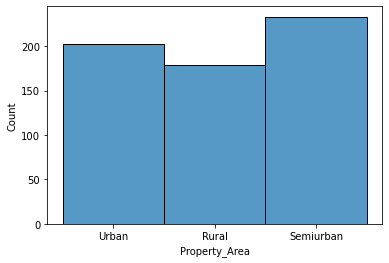

In [25]:
sns.histplot(df['Property_Area'])

Maximum Loan_applicants are from Semiurban area followed by Urban area and Rural area.

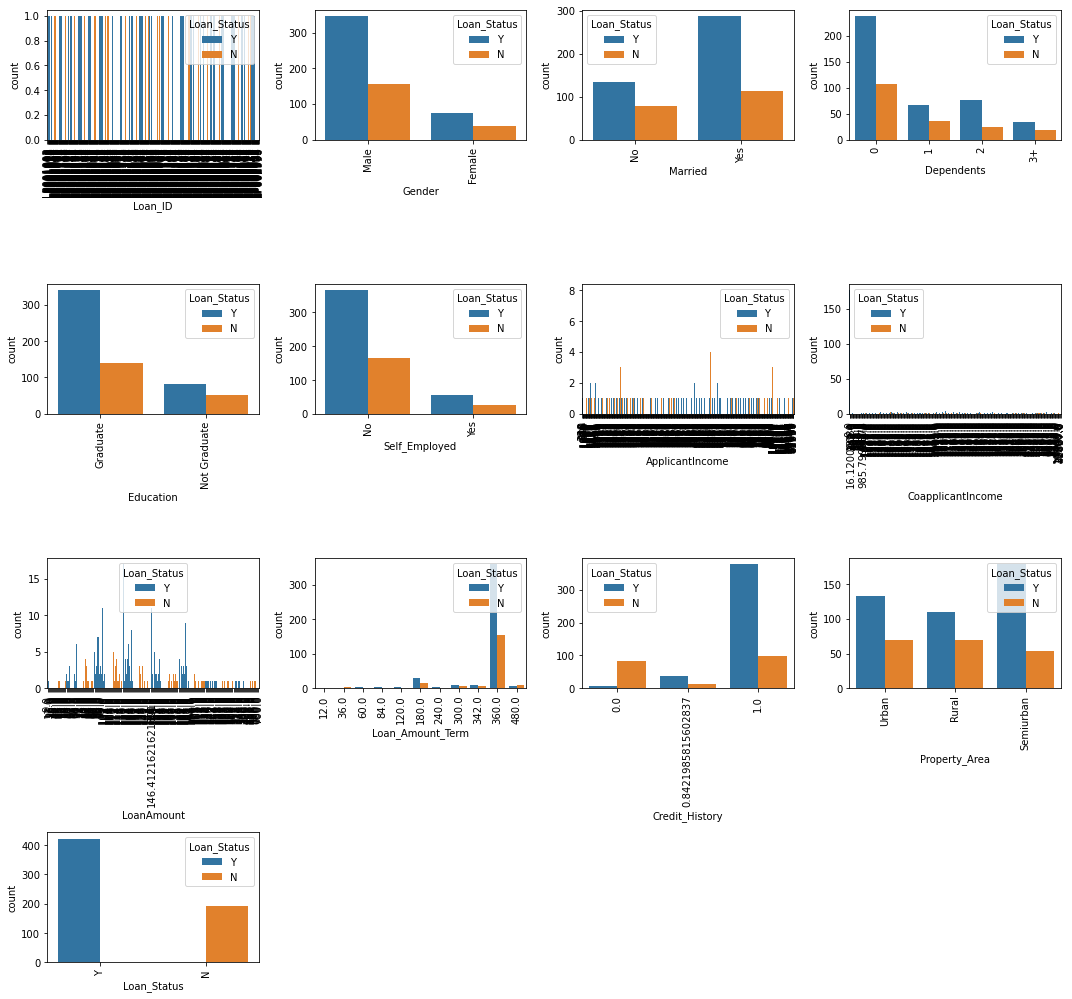

In [26]:
plt.figure(figsize=(15,25))
for i in enumerate(df):
    plt.subplot(7,4,i[0]+1)
    sns.countplot(i[1],hue="Loan_Status",data=df)
    plt.xticks(rotation=90)
    plt.tight_layout()

A countplot of all the columns together .

# Bivariate Analysis

<AxesSubplot:xlabel='ApplicantIncome', ylabel='Loan_Status'>

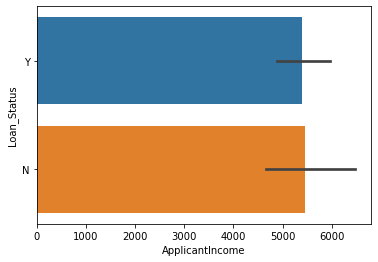

In [27]:
sns.barplot(x=df['ApplicantIncome'], y=df['Loan_Status'])

Seems like ApplicationIncome adds same value to both the class of target variable. 

<AxesSubplot:xlabel='CoapplicantIncome', ylabel='Loan_Status'>

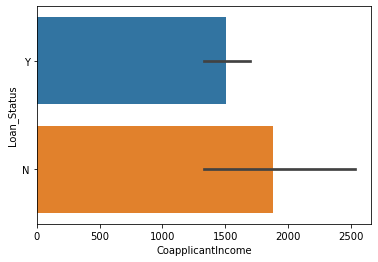

In [28]:
sns.barplot(x=df['CoapplicantIncome'], y=df['Loan_Status'])

Less the coaaplication income , higher is chance of getting a loan.

<AxesSubplot:xlabel='LoanAmount', ylabel='Loan_Status'>

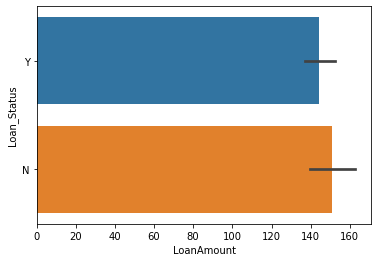

In [29]:
sns.barplot(x=df['LoanAmount'], y=df['Loan_Status'])

Less the loan amount , more are the chances of getting Loan.

<AxesSubplot:xlabel='Loan_Amount_Term', ylabel='Loan_Status'>

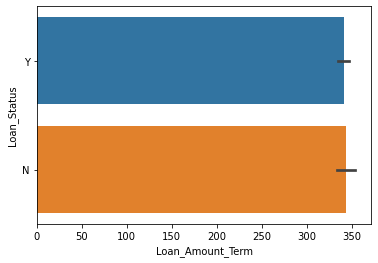

In [30]:
sns.barplot(x=df['Loan_Amount_Term'], y=df['Loan_Status'])

Loan_amount_term doesn't make a difference to Loan_Status.

<AxesSubplot:xlabel='Credit_History', ylabel='Loan_Status'>

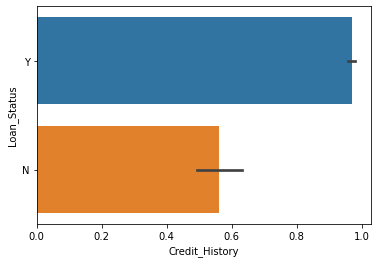

In [31]:
sns.barplot(x=df['Credit_History'], y=df['Loan_Status'])

If credit history is 1, more chances of getting loan.

In [32]:
le = LabelEncoder()
dflist=['Loan_ID','Gender','Married','Education','Gender','Dependents','Self_Employed','Property_Area', 'Loan_Status']
for column in dflist:
    df[column]=le.fit_transform(df[column])
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0,1,0,0,0,0,5849,0.0,146.412162,360.0,1.0,2,1
1,1,1,1,1,0,0,4583,1508.0,128.000000,360.0,1.0,0,0
2,2,1,1,0,0,1,3000,0.0,66.000000,360.0,1.0,2,1
3,3,1,1,0,1,0,2583,2358.0,120.000000,360.0,1.0,2,1
4,4,1,0,0,0,0,6000,0.0,141.000000,360.0,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,609,0,0,0,0,0,2900,0.0,71.000000,360.0,1.0,0,1
610,610,1,1,3,0,0,4106,0.0,40.000000,180.0,1.0,0,1
611,611,1,1,1,0,0,8072,240.0,253.000000,360.0,1.0,2,1
612,612,1,1,2,0,0,7583,0.0,187.000000,360.0,1.0,2,1


We have converted the categorical data to the ordinal data.
In our target column, 'Loan_Status':
    
    1 - Yes
    2 - No

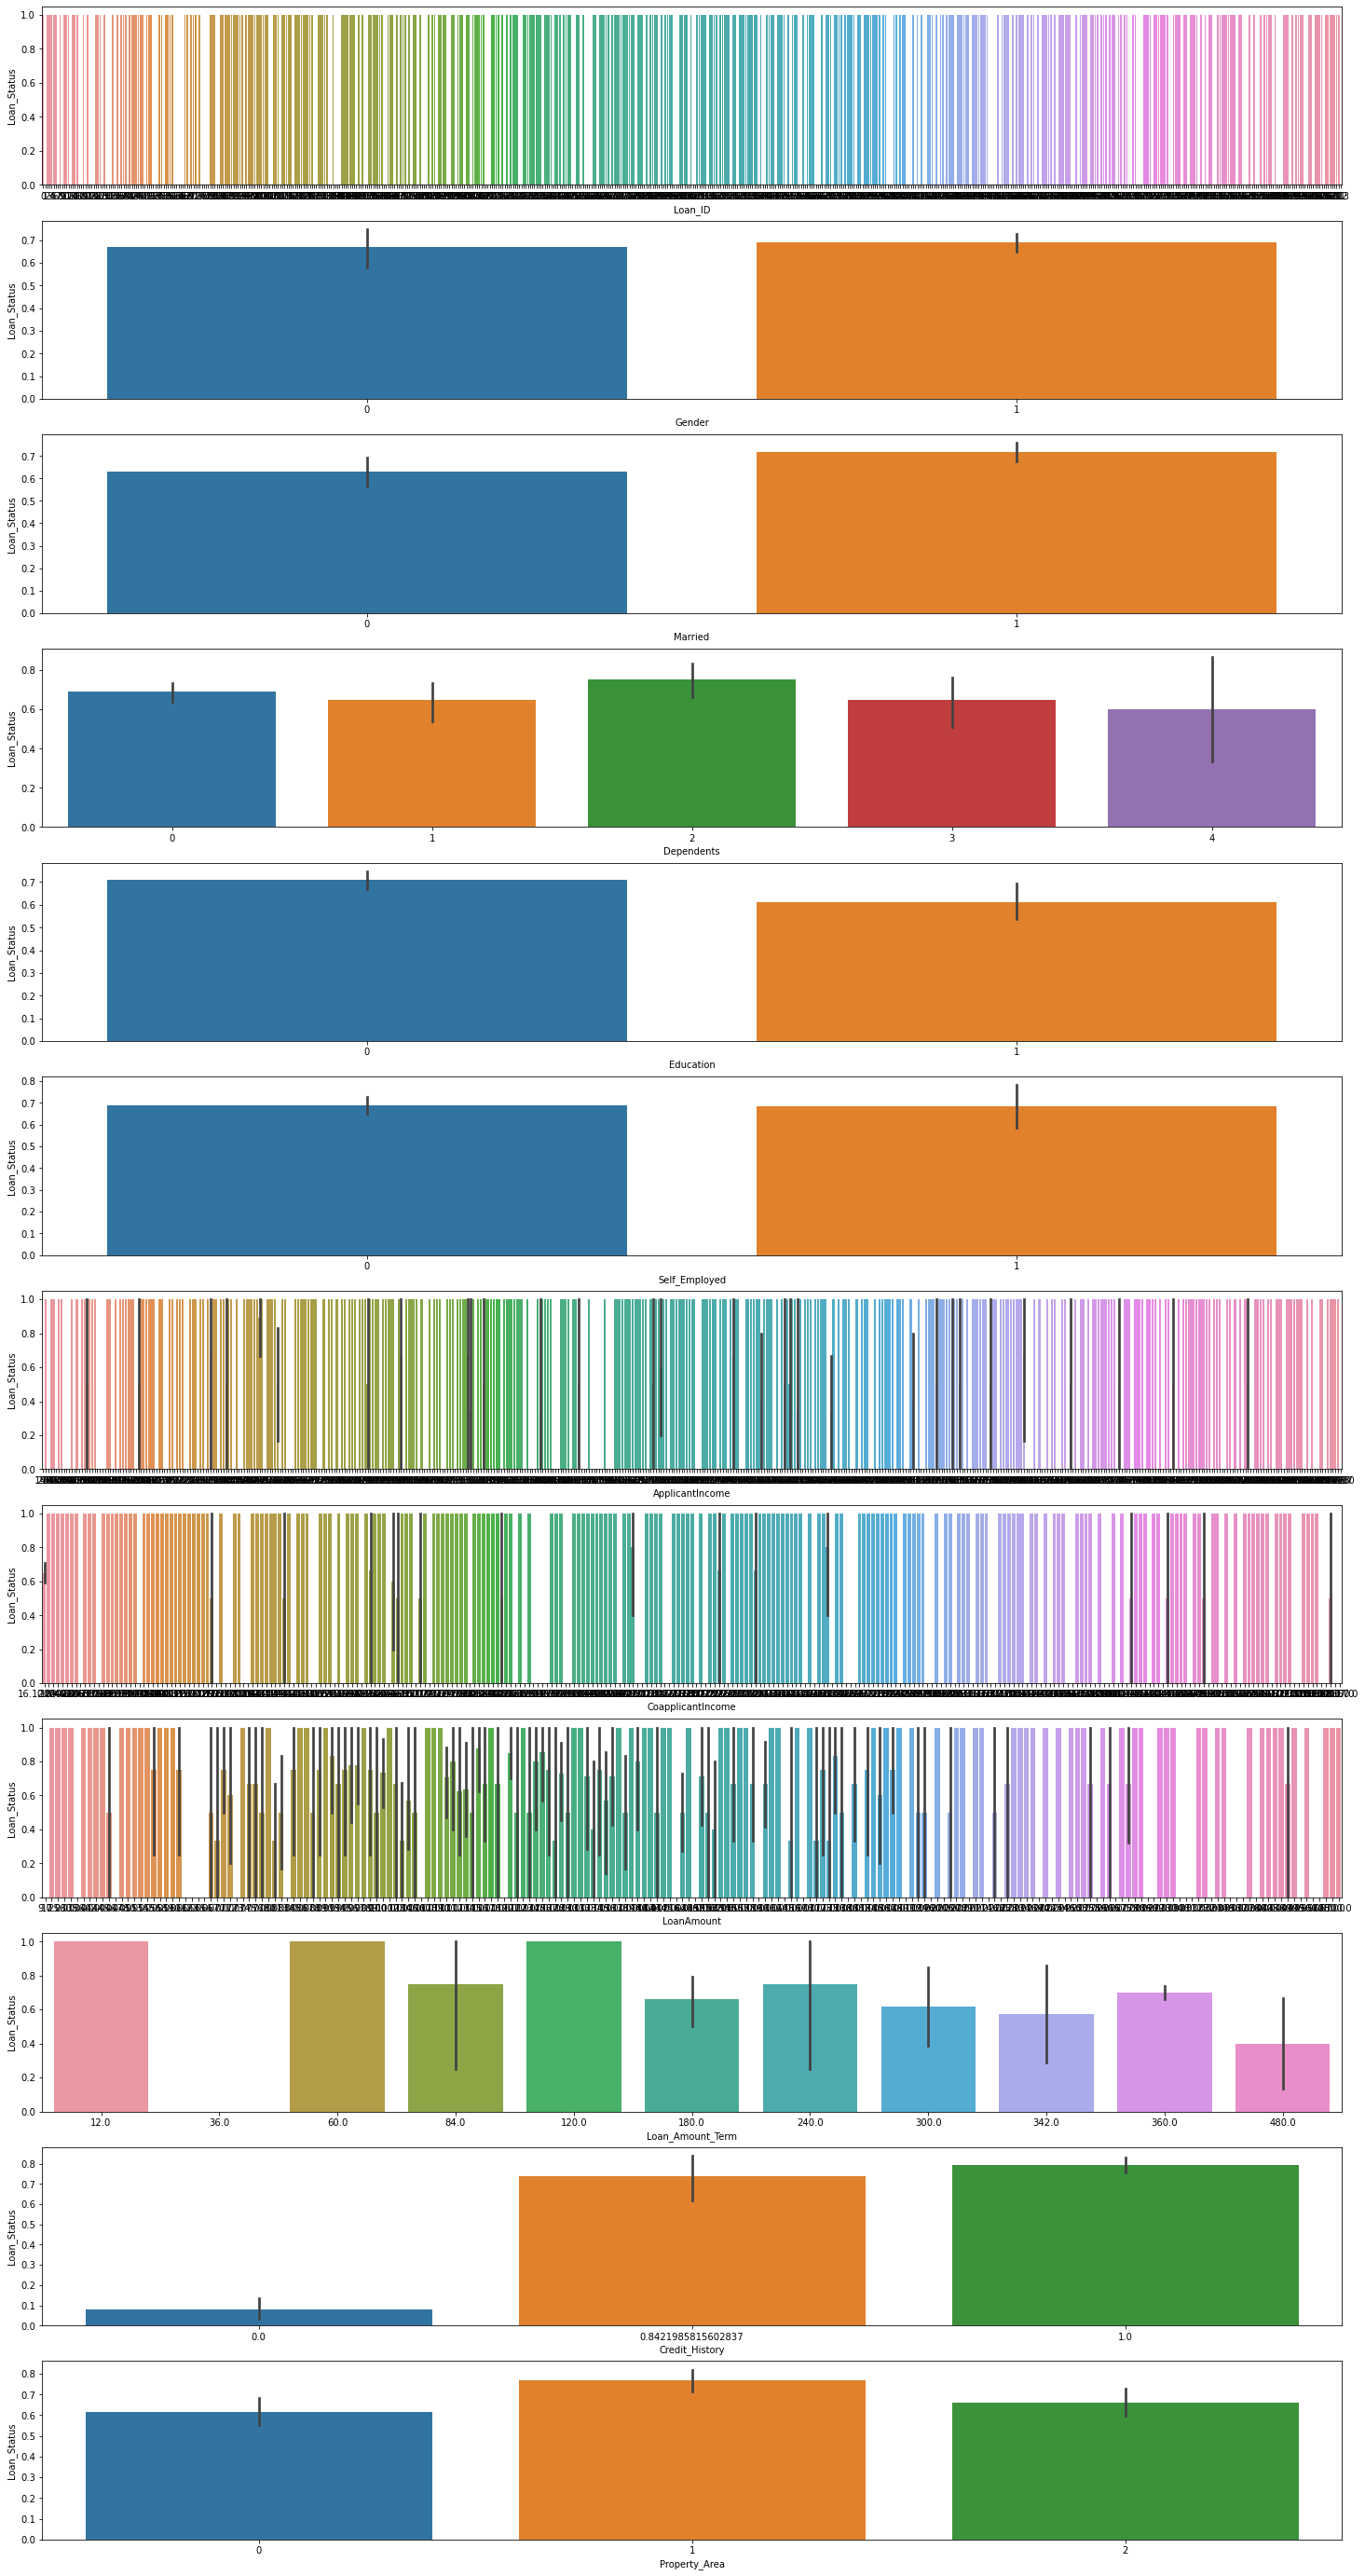

In [33]:
fig, axs = plt.subplots(12, figsize = (25,50))
plt1 = sns.barplot(y=df['Loan_Status'], x=df['Loan_ID'], ax = axs[0])
plt2 = sns.barplot(y=df['Loan_Status'], x=df['Gender'], ax=axs[1])
plt3 = sns.barplot(y=df['Loan_Status'], x=df['Married'], ax=axs[2])
plt4 = sns.barplot(y=df['Loan_Status'], x=df['Dependents'], ax=axs[3])
plt5 = sns.barplot(y=df['Loan_Status'], x=df['Education'], ax=axs[4])
plt6 = sns.barplot(y=df['Loan_Status'], x=df['Self_Employed'], ax=axs[5])
plt7 = sns.barplot(y=df['Loan_Status'], x=df['ApplicantIncome'], ax=axs[6])
plt8 = sns.barplot(y=df['Loan_Status'], x=df['CoapplicantIncome'], ax=axs[7])
plt9 = sns.barplot(y=df['Loan_Status'], x=df['LoanAmount'], ax=axs[8])
plt10 = sns.barplot(y=df['Loan_Status'], x=df['Loan_Amount_Term'],ax=axs[9])
plt11 = sns.barplot(y=df['Loan_Status'], x=df['Credit_History'], ax=axs[10])
plt12 = sns.barplot(y=df['Loan_Status'], x=df['Property_Area'], ax=axs[11])

Bar plots of all the columns together against target variable, "Loan_Status". 'Loan_ID' , "ApplicantIncome" , "CoapplicantIncome" and "LoanAmount" have very wide range of data. 

<AxesSubplot:xlabel='Dependents'>

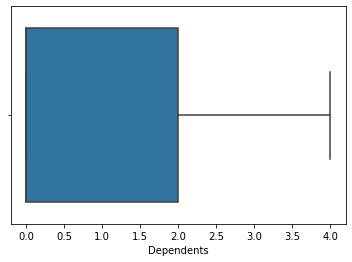

In [34]:
sns.boxplot(df['Dependents'])

There are no outliers in column 'Dependents'.

<AxesSubplot:xlabel='ApplicantIncome'>

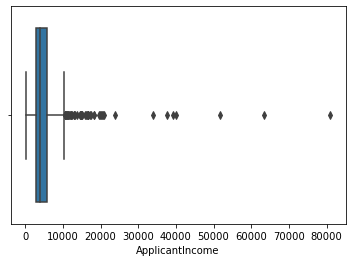

In [35]:
sns.boxplot(df['ApplicantIncome'])

There are lot of outliers in ApplicationIncome

<AxesSubplot:xlabel='CoapplicantIncome'>

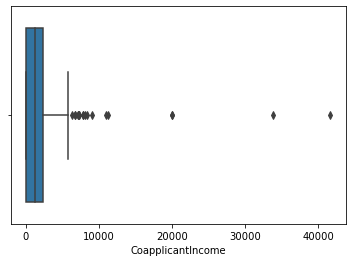

In [36]:
sns.boxplot(df['CoapplicantIncome'])

There are few ouliers in 'CoapplicantIncome'

<AxesSubplot:xlabel='LoanAmount'>

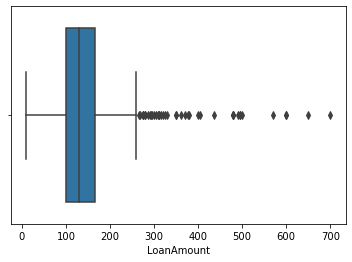

In [37]:
sns.boxplot(df['LoanAmount'])

There are outliers in 'LoanAmount'.

<AxesSubplot:xlabel='Loan_Amount_Term'>

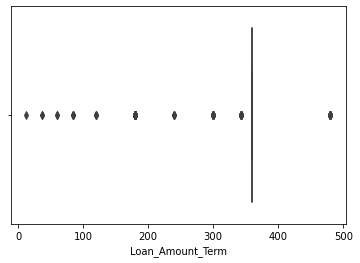

In [38]:
sns.boxplot(df['Loan_Amount_Term'])

There are only outliers in column 'Loan_Amount_Term' hence we should not treat this.

<AxesSubplot:xlabel='Dependents', ylabel='Density'>

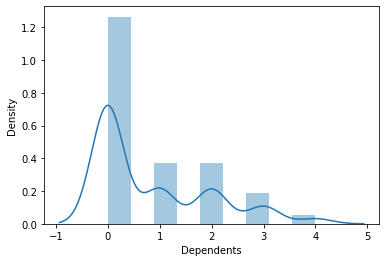

In [39]:
sns.distplot(df['Dependents'])

This data is not normalized.

<AxesSubplot:xlabel='ApplicantIncome', ylabel='Density'>

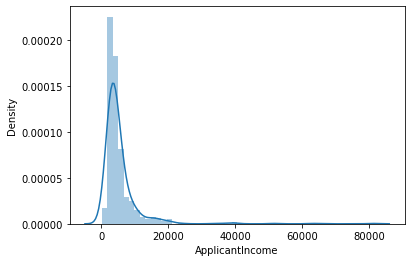

In [40]:
sns.distplot(df['ApplicantIncome'])

'ApplicantIncome' has a very normalized data.

<AxesSubplot:xlabel='CoapplicantIncome', ylabel='Density'>

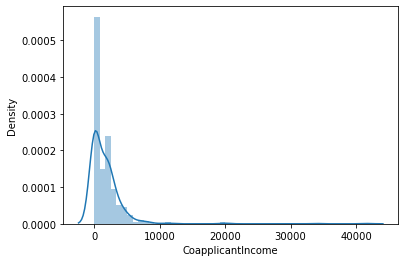

In [41]:
sns.distplot(df['CoapplicantIncome'])

This column has almost normalized data.

<AxesSubplot:xlabel='LoanAmount', ylabel='Density'>

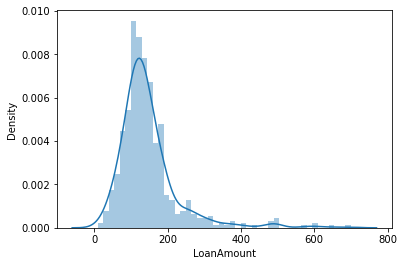

In [42]:
sns.distplot(df['LoanAmount'])

This column has very normalized data.

<AxesSubplot:xlabel='Loan_Amount_Term', ylabel='Density'>

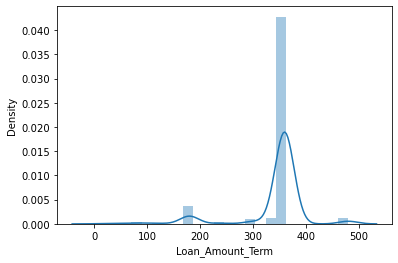

In [43]:
sns.distplot(df['Loan_Amount_Term'])

This is almost normalized data.

# Multivariate Analysis

<AxesSubplot:>

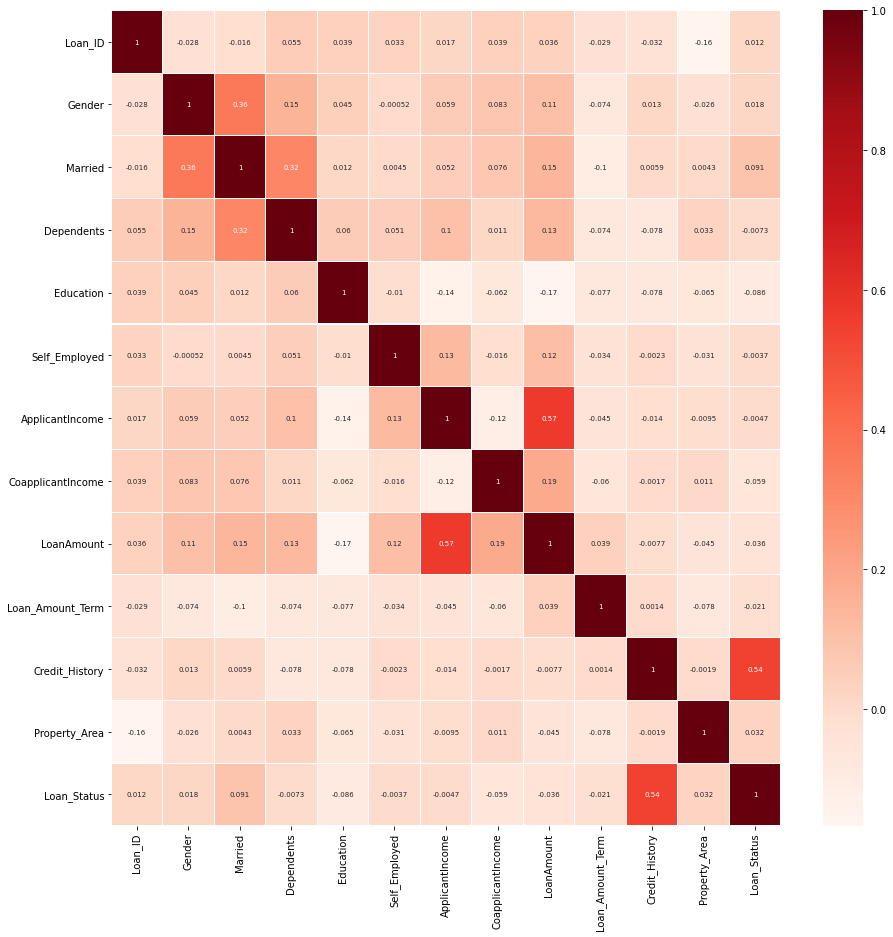

In [44]:
plt.figure(figsize=(15,15))
sns.heatmap(df.corr(), linewidths=.1, cmap="Reds", annot=True, annot_kws={"size":7})

There is no Multi-colinearity present in the dataset.

# Data Cleaning

In [45]:
#Checking for Null values
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

There are no null values left in the dataset.

<AxesSubplot:>

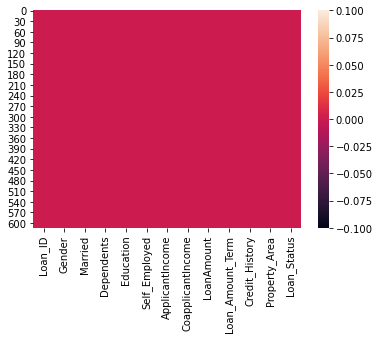

In [46]:
sns.heatmap(df.isnull())

This is the visualization of having absolute no null values in the dataset.

In [47]:
from scipy.stats import zscore
dfzscore=np.abs(zscore(df))
print(np.where(dfzscore>3.5))

(array([ 68, 130, 155, 155, 171, 171, 177, 183, 185, 242, 262, 308, 313,
       333, 333, 369, 402, 409, 417, 443, 487, 495, 497, 506, 523, 546,
       561, 575, 581, 585, 600, 604], dtype=int64), array([9, 8, 6, 8, 6, 8, 8, 6, 6, 9, 9, 8, 9, 6, 8, 8, 7, 6, 7, 6, 8, 9,
       9, 8, 8, 9, 8, 9, 7, 9, 7, 8], dtype=int64))


There are many outliers in the dataset.

In [48]:
dfnew=df[(dfzscore<3.5).all(axis=1)]
df=dfnew
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0,1,0,0,0,0,5849,0.0,146.412162,360.0,1.0,2,1
1,1,1,1,1,0,0,4583,1508.0,128.000000,360.0,1.0,0,0
2,2,1,1,0,0,1,3000,0.0,66.000000,360.0,1.0,2,1
3,3,1,1,0,1,0,2583,2358.0,120.000000,360.0,1.0,2,1
4,4,1,0,0,0,0,6000,0.0,141.000000,360.0,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,609,0,0,0,0,0,2900,0.0,71.000000,360.0,1.0,0,1
610,610,1,1,3,0,0,4106,0.0,40.000000,180.0,1.0,0,1
611,611,1,1,1,0,0,8072,240.0,253.000000,360.0,1.0,2,1
612,612,1,1,2,0,0,7583,0.0,187.000000,360.0,1.0,2,1


We have removed the outliers

In [49]:
((614-585)/614)*100

4.723127035830619

There is 4.72% data loss after removing the outliers which is under acceptable range.

In [50]:
df.skew()

Loan_ID              0.016850
Gender              -1.644689
Married             -0.636519
Dependents           1.125396
Education            1.316088
Self_Employed        2.229920
ApplicantIncome      2.269125
CoapplicantIncome    1.535617
LoanAmount           1.391180
Loan_Amount_Term    -2.138289
Credit_History      -1.944380
Property_Area       -0.051356
Loan_Status         -0.835477
dtype: float64

There is skewness in all the numerical columns.

In [51]:
from sklearn.preprocessing import power_transform
a=df.drop(['Loan_ID', 'Gender', 'Education', 'Married', 'Self_Employed', 'Loan_Status', 'Property_Area'],axis=1)
a=power_transform(a,method='yeo-johnson')

We have treated the skewness .

In [52]:
x=df.drop(['Loan_Status'],axis=1)
y=df['Loan_Status']

from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
x=scale.fit_transform(x)

Separating the feature and target variables, then scaling the data.

<AxesSubplot:xlabel='Loan_Status', ylabel='count'>

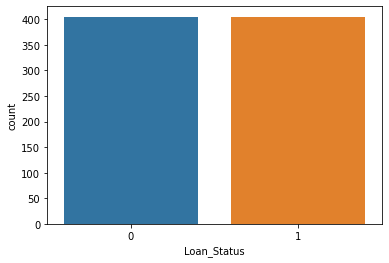

In [53]:
from imblearn.over_sampling import SMOTE
smt=SMOTE()
x,y = smt.fit_resample(x,y)
sns.countplot(y)

Balancing both the classes by over_sampling.

In [54]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=54)

from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(x_train,y_train)
pred_train_lr=lr.predict(x_train)
predlr=lr.predict(x_test)
print('Accuracy of Logistic Regression is',(accuracy_score(y_test,predlr))*100,'%')

rf = RandomForestClassifier()
rf.fit(x_train,y_train)
rf.score(x_train,y_train)
predrf=rf.predict(x_test)
print('Accuracy of RandomForest Classifier is',(accuracy_score(y_test,predrf))*100,'%')

kn = KNeighborsClassifier(n_neighbors=5)
kn.fit(x_train,y_train)
kn.score(x_train,y_train)
predkn=kn.predict(x_test)
print('Accuracy of KNeighbors Classifier is',(accuracy_score(y_test,predkn))*100,'%')

dt = DecisionTreeClassifier()
dt.fit(x_train,y_train)
dt.score(x_train,y_train)
preddt=dt.predict(x_test)
print('Accuracy of DecisionTree Classifier is',(accuracy_score(y_test,preddt))*100,'%')

sv = SVC()
sv.fit(x_train,y_train)
sv.score(x_train,y_train)
predsv=sv.predict(x_test)
print('Accuracy of SVC is',(accuracy_score(y_test,predsv))*100,'%')

Accuracy of Logistic Regression is 75.30864197530865 %
Accuracy of RandomForest Classifier is 91.35802469135803 %
Accuracy of KNeighbors Classifier is 75.92592592592592 %
Accuracy of DecisionTree Classifier is 81.48148148148148 %
Accuracy of SVC is 79.62962962962963 %


Here we get accuracies of all the 5 models we have used.

# Cross Validation Score

In [55]:
print("CVS for Logistic Regression =",cvs(lr,x,y,cv=5).mean()*100,"%")
print("CVS for Random Forest Classifier =",cvs(rf,x,y,cv=5).mean()*100,"%")
print("CVS for K-Neighbor Classifier =",cvs(kn,x,y,cv=5).mean()*100,"%")
print("CVS for DecisionTree Classifier =",cvs(dt,x,y,cv=5).mean()*100,"%")
print("CVS for Support Vector Machine Classifier =",cvs(sv,x,y,cv=5).mean()*100,"%")

CVS for Logistic Regression = 69.1358024691358 %
CVS for Random Forest Classifier = 54.074074074074076 %
CVS for K-Neighbor Classifier = 72.22222222222221 %
CVS for DecisionTree Classifier = 49.629629629629626 %
CVS for Support Vector Machine Classifier = 71.85185185185185 %


The least difference between accuracy and cvs is for model 'KNeighborClassifier'. But since the accuracy of 'RandomForestClassfier' is most , we will hypertune that model.

# Hyper Parameter Tuning

In [56]:
parameter={'n_estimators':np.arange(50,350,50),
          'criterion':['gini','entropy'],
          'max_features':['auto','sqrt','log2'],
          'class_weight':['balanced', 'balanced_subsample']}
gvc = GridSearchCV(RandomForestClassifier(),parameter,cv=5)
gvc.fit(x_train,y_train)
gvc.best_params_

{'class_weight': 'balanced',
 'criterion': 'gini',
 'max_features': 'log2',
 'n_estimators': 250}

We get the best parameters to be used in RandomForestClassifier() to increase it's accuracy.

In [57]:
LoanStatusPrediction = RandomForestClassifier(criterion='gini',n_estimators=250,max_features='log2',class_weight='balanced')
LoanStatusPrediction.fit(x_train,y_train)
pred=LoanStatusPrediction.predict(x_test)
acc=accuracy_score(y_test,pred)
print("Accuracy of Random Forest Classifier for Loan Status Prediction Model is ", acc*100, "%")

Accuracy of Random Forest Classifier for Loan Status Prediction Model is 93.20987654320987 % 


The accuracy we got for final model is very good.

# AUC-ROC CURVE

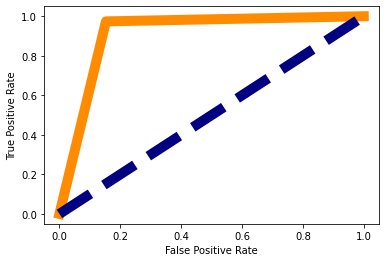

In [58]:
from sklearn.metrics import roc_curve , auc
from sklearn.metrics import roc_auc_score
fpr,tpr,thresholds = roc_curve(y_test,pred)
roc_auc = auc(fpr,tpr)
plt.figure()
plt.plot(fpr,tpr,color='darkorange',lw=10,label="ROC CURVE")
plt.plot([0,1],[0,1],color='navy',lw=10,linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

Since the model without outliers and Class Imbalance is working welll. Hence we will choose that only.

# Conclusion

In [59]:
a= np.array(y_test)
predicted = np.array(LoanStatusPrediction.predict(x_test))
LS_Prediction=pd.DataFrame({"Original":a,"Predicted":predicted},index=range(len(a)))
LS_Prediction

,Original,Predicted
0,0,0
1,1,1
2,0,0
3,0,0
4,1,1
...,...,...
157,0,0
158,0,0
159,1,0
160,0,0


We can see that almost all the predicted values are equal to the Original values and hence we conclude that our model is working very well.

# Model Saving

In [60]:
import pickle
filename = 'LoanStatus.pkl'
pickle.dump(LoanStatusPrediction,open(filename,'wb'))

We have saved our final model .